In [ ]:
library(tidyverse)
data <- read_csv("./data/possion.csv")
head(data)

# ID tea smoke beat
# 1 1  1   1     13  
# 2 2  0   1      7  
# 3 3  0   0      2  
# 4 4  1   1      9  
# 5 5  0   0      2  
# 6 6  1   1     12

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 39 Columns: 4
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (4): ID, tea, smoke, beat

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,tea,smoke,beat
<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,13
2,0,1,7
3,0,0,2
4,1,1,9
5,0,0,2
6,1,1,12


In [ ]:
data %>% glimpse()

Rows: 39
Columns: 4
$ ID    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1~
$ tea   <dbl> 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0~
$ smoke <dbl> 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0~
$ beat  <dbl> 13, 7, 2, 9, 2, 12, 6, 10, 4, 7, 1, 8, 6, 17, 5, 12, 9, 7, 8, 5,~


In [ ]:
library(modelsummary)
datasummary_skim(data)

# +-------+--------+--------------+------+------+-----+--------+------+---------------------------------------------------------------+
# |       | Unique | Missing Pct. | Mean | SD   | Min | Median | Max  | Histogram                                                     |
# +=======+========+==============+======+======+=====+========+======+===============================================================+
# | ID    | 39     | 0            | 20.0 | 11.4 | 1.0 | 20.0   | 39.0 | ![](tinytable_assets/idkh0cc0znu2b62jsedmkw.png){ height=16 } |
# +-------+--------+--------------+------+------+-----+--------+------+---------------------------------------------------------------+
# | tea   | 2      | 0            | 0.5  | 0.5  | 0.0 | 0.0    | 1.0  | ![](tinytable_assets/idgr2le5rg82100tt3yy07.png){ height=16 } |
# +-------+--------+--------------+------+------+-----+--------+------+---------------------------------------------------------------+
# | smoke | 2      | 0            | 0.6  | 0.5  | 0.0 | 1.0    | 1.0  | ![](tinytable_assets/idc5bsq55kveuqx8a9atj0.png){ height=16 } |
# +-------+--------+--------------+------+------+-----+--------+------+---------------------------------------------------------------+
# | beat  | 14     | 0            | 7.3  | 3.3  | 1.0 | 7.0    | 17.0 | ![](tinytable_assets/idw3b7nwm1jevidh0jibxv.png){ height=16 } |
# +-------+--------+--------------+------+------+-----+--------+------+---------------------------------------------------------------+


+-------+--------+--------------+------+------+-----+--------+------+---------------------------------------------------------------+
|       | Unique | Missing Pct. | Mean | SD   | Min | Median | Max  | Histogram                                                     |
+=======+========+==============+======+======+=====+========+======+===============================================================+
| ID    | 39     | 0            | 20.0 | 11.4 | 1.0 | 20.0   | 39.0 | ![](tinytable_assets/idkh0cc0znu2b62jsedmkw.png){ height=16 } |
+-------+--------+--------------+------+------+-----+--------+------+---------------------------------------------------------------+
| tea   | 2      | 0            | 0.5  | 0.5  | 0.0 | 0.0    | 1.0  | ![](tinytable_assets/idgr2le5rg82100tt3yy07.png){ height=16 } |
+-------+--------+--------------+------+------+-----+--------+------+---------------------------------------------------------------+
| smoke | 2      | 0            | 0.6  | 0.5  | 0.0 | 1.0    

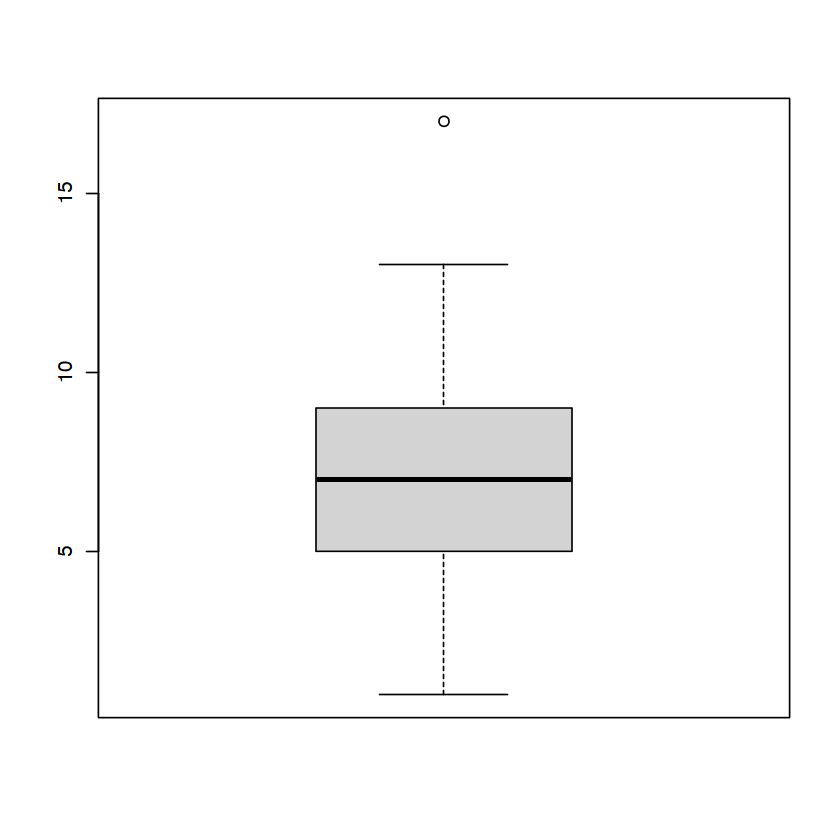

In [5]:
boxplot(data$beat)

In [ ]:
# 使用 data 而不是 mydata，并优化代码格式
fit1 <- glm(
  beat ~ tea + smoke,
  data = data,
  family = poisson()
)  # 建立 Poisson 回归模型
summary(fit1)  # 查看回归模型参数

# 计算残差偏差与残差自由度的比值
c <- deviance(fit1) / df.residual(fit1)
c  # 输出比值

# [1] 0.6975453


Call:
glm(formula = beat ~ tea + smoke, family = poisson(), data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.3319     0.1422   9.366  < 2e-16 ***
tea           0.4231     0.1204   3.513 0.000442 ***
smoke         0.6084     0.1397   4.355 1.33e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 57.996  on 38  degrees of freedom
Residual deviance: 25.112  on 36  degrees of freedom
AIC: 176.77

Number of Fisher Scoring iterations: 4


[1] 0.6975453

In [ ]:
library(car) #加载car包
fit2 <- lm(beat ~ tea + smoke, data = data) #建立回归模型
vif(fit2) #计算VIF

# # tea    smoke 
# 1.000369 1.000369

tea    smoke 
1.000369 1.000369

In [ ]:
# 使用 data 而不是 mydata，并优化代码格式
fit <- glm(
  beat ~ tea + smoke,
  data = data,
  family = poisson()
)  # 建立 Poisson 回归模型

summary(fit)                # 查看回归模型参数
confint(fit)                # 计算系数的95%置信区间
exp(coef(fit))              # 计算IRR
exp(confint(fit))           # 计算IRR的95%置信区间

# Call:
# glm(formula = beat ~ tea + smoke, family = poisson(), data = data)

# Coefficients:
#             Estimate Std. Error z value Pr(>|z|)    
# (Intercept)   1.3319     0.1422   9.366  < 2e-16 ***
# tea           0.4231     0.1204   3.513 0.000442 ***
# smoke         0.6084     0.1397   4.355 1.33e-05 ***
# ---
# Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# (Dispersion parameter for poisson family taken to be 1)

#     Null deviance: 57.996  on 38  degrees of freedom
# Residual deviance: 25.112  on 36  degrees of freedom
# AIC: 176.77

# Number of Fisher Scoring iterations: 4

# 2.5 %     97.5 %   
# (Intercept) 1.0438101 1.6017535
# tea         0.1884714 0.6611047
# smoke       0.3407066 0.8892835

# (Intercept)         tea       smoke 
#    3.788083    1.526721    1.837411

# 2.5 %    97.5 %  
# (Intercept) 2.840017 4.961725
# tea         1.207403 1.936931
# smoke       1.405941 2.433385


Call:
glm(formula = beat ~ tea + smoke, family = poisson(), data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.3319     0.1422   9.366  < 2e-16 ***
tea           0.4231     0.1204   3.513 0.000442 ***
smoke         0.6084     0.1397   4.355 1.33e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 57.996  on 38  degrees of freedom
Residual deviance: 25.112  on 36  degrees of freedom
AIC: 176.77

Number of Fisher Scoring iterations: 4


Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),1.0438101,1.6017535
tea,0.1884714,0.6611047
smoke,0.3407066,0.8892835


(Intercept)         tea       smoke 
   3.788083    1.526721    1.837411

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),2.840017,4.961725
tea,1.207403,1.936931
smoke,1.405941,2.433385


In [10]:
# cook距离
library(car)
cooks.distance(fit)  # 计算Cook's距离

1            2            3            4            5            6 
1.556253e-02 5.767488e-06 2.527341e-02 7.306395e-03 2.527341e-02 5.211834e-03 
           7            8            9           10           11           12 
3.317861e-04 3.374998e-02 2.247999e-02 5.767488e-06 6.144689e-02 3.473127e-02 
          13           14           15           16           17           18 
3.368079e-03 1.122097e-01 1.403558e-02 5.211834e-03 1.519672e-02 8.154876e-02 
          19           20           21           22           23           24 
1.905346e-02 4.337426e-03 1.083767e-03 3.867465e-02 3.855805e-04 3.549948e-04 
          25           26           27           28           29           30 
3.200828e-02 1.403558e-02 1.083767e-03 1.519672e-02 5.767488e-06 3.473127e-02 
          31           32           33           34           35           36 
7.306395e-03 3.317861e-04 1.161007e-02 7.306395e-03 5.767488e-06 1.403558e-02 
          37           38           39 
5.475947e-02 1.905346e-02 1.519672e-02